# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

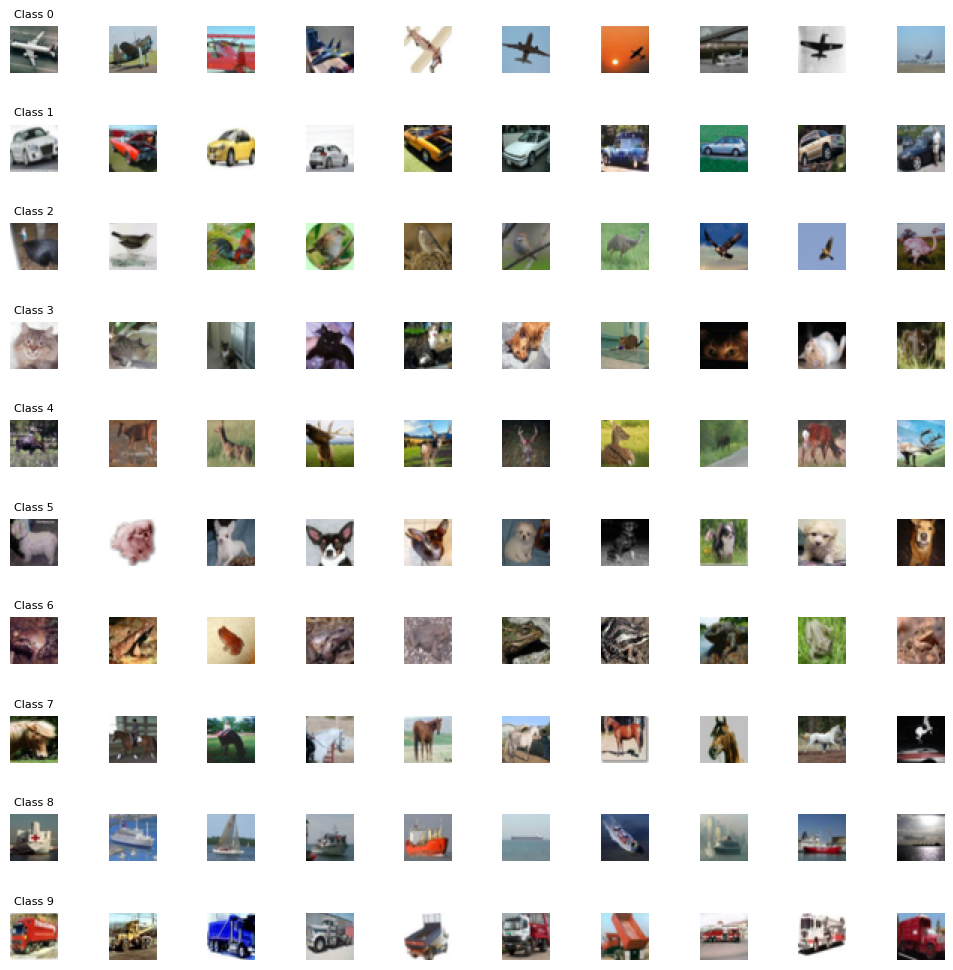

In [2]:
def plot_cifar10_samples(x, y):
    # Create a 10 x 10 grid of subplots
    fig, axes = plt.subplots(10, 10, figsize=(10, 10))
    fig.tight_layout()
    # For each class (0 through 9)
    for i in range(10):
        # Get indices for samples of class i
        idx = np.where(y.flatten() == i)[0]
        # Randomly select 10 indices from this class
        selected_idx = np.random.choice(idx, 10, replace=False)
        for j, index in enumerate(selected_idx):
            ax = axes[i, j]
            ax.imshow(x[index])
            ax.axis('off')
            if j == 0:
                ax.set_title("Class " + str(i), fontsize=8)
    plt.show()

# Visualize 10 random samples from each class
plot_cifar10_samples(x_train, y_train)


In [4]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)


In [5]:
# Convert pixel values to float and scale to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("x_train shape:", x_train.shape)
print("y_train_onehot shape:", y_train_onehot.shape)


x_train shape: (50000, 32, 32, 3)
y_train_onehot shape: (50000, 10)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [6]:
from keras.backend import clear_session
clear_session()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session
clear_session()

model_simple = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])
model_simple.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         819,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 821,206 (3.13 MB)

 Trainable params: 821,206 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [8]:
from tensorflow.keras.optimizers import SGD

model_simple.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

history_simple = model_simple.fit(x_train, y_train_onehot,
                                  validation_data=(x_test, y_test_onehot),
                                  epochs=50, batch_size=512, verbose=2)


Epoch 1/50
98/98 - 14s - 144ms/step - accuracy: 0.2086 - loss: 2.2070 - val_accuracy: 0.2559 - val_loss: 2.1296
Epoch 2/50
98/98 - 13s - 131ms/step - accuracy: 0.2788 - loss: 2.0620 - val_accuracy: 0.2951 - val_loss: 2.0081
Epoch 3/50
98/98 - 13s - 130ms/step - accuracy: 0.3132 - loss: 1.9666 - val_accuracy: 0.3231 - val_loss: 1.9330
Epoch 4/50
98/98 - 13s - 130ms/step - accuracy: 0.3345 - loss: 1.9101 - val_accuracy: 0.3171 - val_loss: 1.9019
Epoch 5/50
98/98 - 13s - 129ms/step - accuracy: 0.3459 - loss: 1.8768 - val_accuracy: 0.3524 - val_loss: 1.8574
Epoch 6/50
98/98 - 15s - 148ms/step - accuracy: 0.3577 - loss: 1.8443 - val_accuracy: 0.3651 - val_loss: 1.8344
Epoch 7/50
98/98 - 16s - 163ms/step - accuracy: 0.3714 - loss: 1.8140 - val_accuracy: 0.3692 - val_loss: 1.7989
Epoch 8/50
98/98 - 14s - 138ms/step - accuracy: 0.3794 - loss: 1.7896 - val_accuracy: 0.3818 - val_loss: 1.7779
Epoch 9/50
98/98 - 13s - 135ms/step - accuracy: 0.3875 - loss: 1.7649 - val_accuracy: 0.3845 - val_loss:

*   Plot the cross entropy loss curve and the accuracy curve

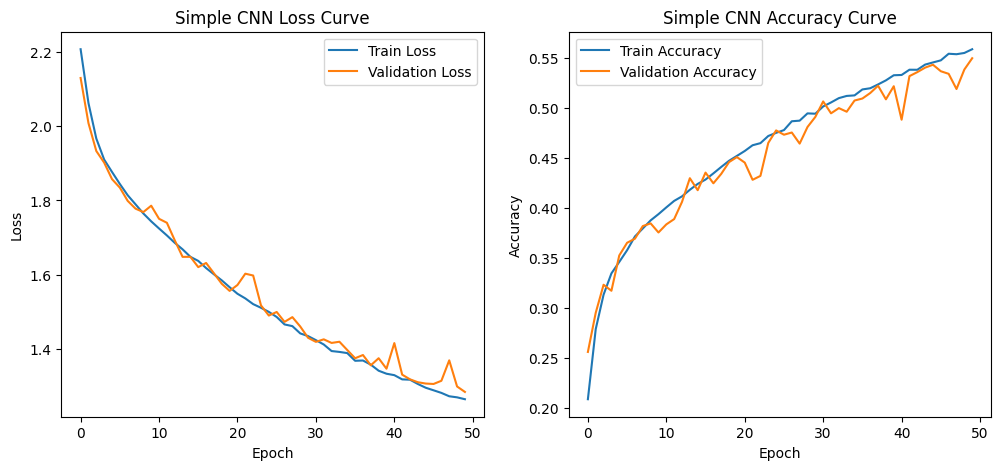

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Train Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Simple CNN Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history_simple.history['accuracy'], label='Train Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Validation Accuracy')
plt.title('Simple CNN Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [10]:
from keras.backend import clear_session
clear_session()

In [11]:
clear_session()

model_vgg = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_vgg.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [12]:
model_vgg.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

history_vgg = model_vgg.fit(x_train, y_train_onehot,
                            validation_data=(x_test, y_test_onehot),
                            epochs=50, batch_size=512, verbose=2)


Epoch 1/50
98/98 - 40s - 406ms/step - accuracy: 0.1935 - loss: 2.2226 - val_accuracy: 0.2649 - val_loss: 2.1220
Epoch 2/50
98/98 - 40s - 408ms/step - accuracy: 0.2780 - loss: 2.0463 - val_accuracy: 0.1997 - val_loss: 2.2220
Epoch 3/50
98/98 - 40s - 403ms/step - accuracy: 0.3066 - loss: 1.9690 - val_accuracy: 0.3183 - val_loss: 1.9320
Epoch 4/50
98/98 - 40s - 405ms/step - accuracy: 0.3386 - loss: 1.8909 - val_accuracy: 0.3466 - val_loss: 1.8731
Epoch 5/50
98/98 - 39s - 399ms/step - accuracy: 0.3589 - loss: 1.8350 - val_accuracy: 0.3574 - val_loss: 1.8246
Epoch 6/50
98/98 - 38s - 391ms/step - accuracy: 0.3705 - loss: 1.7919 - val_accuracy: 0.3889 - val_loss: 1.7551
Epoch 7/50
98/98 - 38s - 390ms/step - accuracy: 0.3827 - loss: 1.7569 - val_accuracy: 0.3975 - val_loss: 1.7117
Epoch 8/50
98/98 - 39s - 395ms/step - accuracy: 0.3971 - loss: 1.7191 - val_accuracy: 0.3902 - val_loss: 1.7182
Epoch 9/50
98/98 - 38s - 390ms/step - accuracy: 0.4060 - loss: 1.6929 - val_accuracy: 0.3950 - val_loss:

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


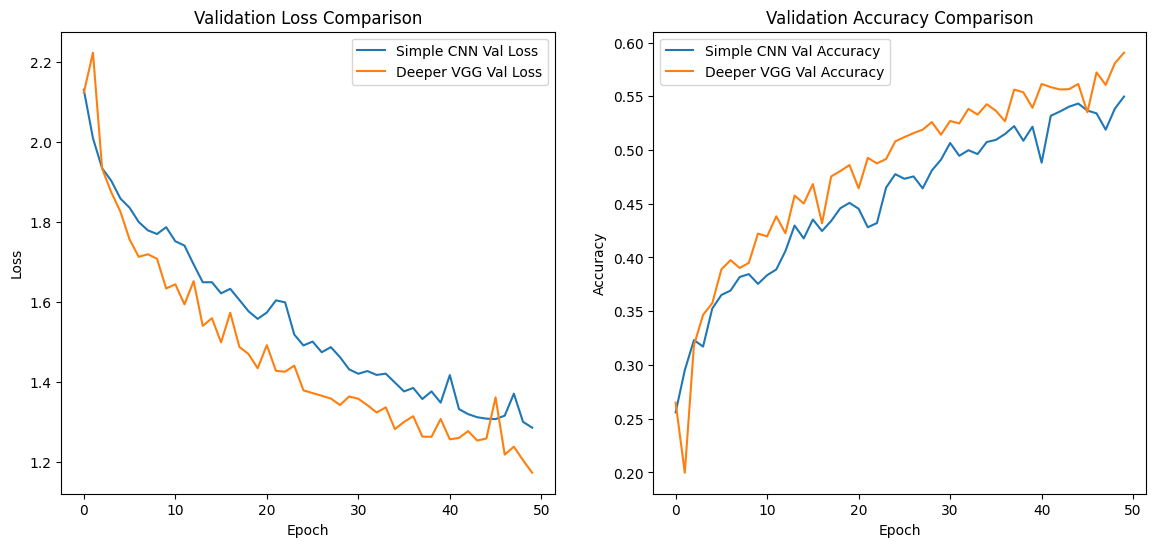

In [13]:
plt.figure(figsize=(14, 6))

# Loss Comparison
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['val_loss'], label='Simple CNN Val Loss')
plt.plot(history_vgg.history['val_loss'], label='Deeper VGG Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Comparison
plt.subplot(1, 2, 2)
plt.plot(history_simple.history['val_accuracy'], label='Simple CNN Val Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Deeper VGG Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Comment on the observation:
# For example: "The deeper VGG model shows improved validation accuracy and lower loss compared to the simple CNN model,
# indicating that the additional layers help capture more complex features. However, training time increases."


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Confusion Matrix:
 [[601  33  34  25  36   6  31  24 154  56]
 [ 30 686   9  10   6   3  20  17  53 166]
 [ 79  12 325 103 176  70 120  74  25  16]
 [ 17   8  31 452  97 154 127  65  17  32]
 [ 28   6  54  64 550  46 127 100  18   7]
 [ 14   4  24 221  90 473  64  84   9  17]
 [  4  14  34  58  80  27 737  22   9  15]
 [ 12   8  17  79  67  51  31 689  14  32]
 [ 71  55   7  28  22   5  10  13 727  62]
 [ 32 131   3  31   8  11  33  39  47 665]]
Confusion matrix, without normalization
[[601  33  34  25  36   6  31  24 154  56]
 [ 30 686   9  10   6   3  20  17  53 166]
 [ 79  12 325 103 176  70 120  74  25  16]
 [ 17   8  31 452  97 154 127  65  17  32]
 [ 28   6  54  64 550  46 127 100  18   7]
 [ 14   4  24 221  90 473  64  84   9  17]
 [  4  14  34  58  80  27 737  22   9  15]
 [ 12   8  17  79  67  51  31 689  14  32]
 [ 71  55   7  28  22   5  10  13 727  62]
 [ 32 131   3  31   8  11  33  39  47 665]]


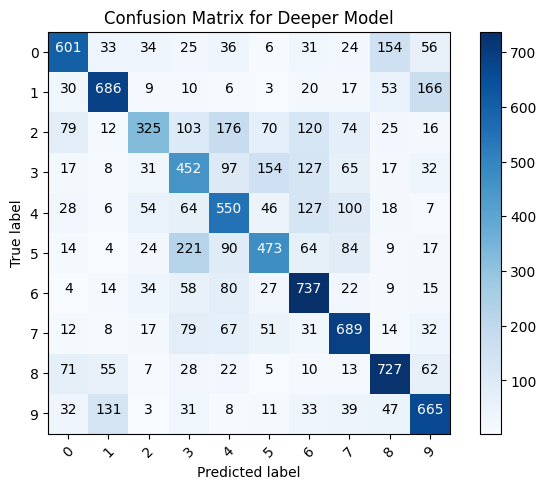

              precision    recall  f1-score   support

           0       0.68      0.60      0.64      1000
           1       0.72      0.69      0.70      1000
           2       0.60      0.33      0.42      1000
           3       0.42      0.45      0.44      1000
           4       0.49      0.55      0.52      1000
           5       0.56      0.47      0.51      1000
           6       0.57      0.74      0.64      1000
           7       0.61      0.69      0.65      1000
           8       0.68      0.73      0.70      1000
           9       0.62      0.67      0.64      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Predict using the deeper model (VGG)
y_pred_vgg = model_vgg.predict(x_test)
y_pred_labels = np.argmax(y_pred_vgg, axis=1)
true_labels = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, y_pred_labels)
print("Confusion Matrix:\n", cm)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cm, classes=[str(i) for i in range(10)], normalize=False, title='Confusion Matrix for Deeper Model')
plt.show()

print(classification_report(true_labels, y_pred_labels))



**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [15]:
test_loss, test_accuracy = model_vgg.evaluate(x_test, y_test_onehot, verbose=0)
print("Test Accuracy for Deeper Model: {:.2f}%".format(test_accuracy * 100))


Test Accuracy for Deeper Model: 59.05%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [2]:
from keras.backend import clear_session
clear_session()

In [5]:
from keras.backend import clear_session
clear_session()

# First, resize the CIFAR-10 images from 32x32 to 64x64.
import cv2

def resize_images(images, size=(64, 64)):
    # Create an array for resized images
    resized = np.zeros((images.shape[0], size[0], size[1], images.shape[3]), dtype='float32')
    for i in range(images.shape[0]):
        resized[i] = cv2.resize(images[i], size)
    return resized

x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_vgg_complete = Sequential([
    # Block 1: Two conv layers with 64 filters
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Block 2: Two conv layers with 128 filters
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Block 3: Two conv layers with 256 filters
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_vgg_complete.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
model_vgg_complete.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

history_vgg_complete = model_vgg_complete.fit(x_train_resized, y_train_onehot,
                                              validation_data=(x_test_resized, y_test_onehot),
                                              epochs=10, batch_size=512, verbose=2)


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
